# CSX46 - Class Session 9 - similarity and hierarchical clustering

In this class session we are going to hierachically cluster (based on Sorensen-Dice similarity) vertices in a directed graph from a landmark paper on human gene regulation (Neph et al., Cell, volume 150, pages 1274-1286, 2012; see PDF on Canvas)

Using Pandas `read_csv`, read in the ifle `shared/neph_gene_network.txt`, which has two columns of text (first column is the regulator gene, second column is the target gene), into a data frame. The file has no header and is tab-delimited.  Assign the column names of the dataframe to be `regulator` and `target`, respectively.

Let's load the Python packages that we will need for this exercise

In [1]:
import pandas
import igraph
import numpy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance

Using `pandas.read_csv`, read the file `shared/neph_gene_network.txt`; name the two columns of the resulting data frame, `regulator` and `target`.

In [2]:
edge_list_neph = pandas.read_csv("shared/neph_gene_network.txt",
                                 sep="\t", 
                                 names=["regulator","target"])

Load the edge-list data into an undirected `igraph.Graph` object `neph_graph`, using `igraph.Graph.TupleList`. 

In [3]:
neph_graph = igraph.Graph.TupleList(edge_list_neph.values.tolist(), directed=False)
neph_graph.summary()

'IGRAPH UN-- 538 47945 -- \n+ attr: name (v)'

Using the igraph `Graph.similarity_dice()` method, compute a similarity matrix and assign it to name `S`

In [4]:
S = neph_graph.similarity_dice()

Using the `numpy.matrix` constructor, compute a distance matrix (1-S) and assign to object `D`

In [5]:
D = 1 - numpy.matrix(S)

Use scipy.spatial.distance.squareform to make a vector-form distance vector from the square-form distance matrix `D`; call the resulting object `vD`

In [6]:
vD = scipy.spatial.distance.squareform(D)

Using `scipy.cluster.hierarchy.linkage` on `vD` (with `method="average")`, perform hierarchical agglomerative clustering.  Assign the resulting object to name `hc`

In [7]:
hc = scipy.cluster.hierarchy.linkage(vD, method="average")

Plot a dendrogram using `scipy.cluster.hierarchy.dendrogram`

array([[1.00000000e+01, 1.10000000e+01, 1.78970917e-02, 2.00000000e+00],
       [6.40000000e+01, 6.60000000e+01, 1.82926829e-02, 2.00000000e+00],
       [6.50000000e+01, 6.70000000e+01, 2.02774813e-02, 2.00000000e+00],
       ...,
       [3.23000000e+02, 1.07000000e+03, 8.70781231e-01, 5.35000000e+02],
       [1.07100000e+03, 1.07200000e+03, 9.06844511e-01, 5.37000000e+02],
       [3.71000000e+02, 1.07300000e+03, 9.25471476e-01, 5.38000000e+02]])

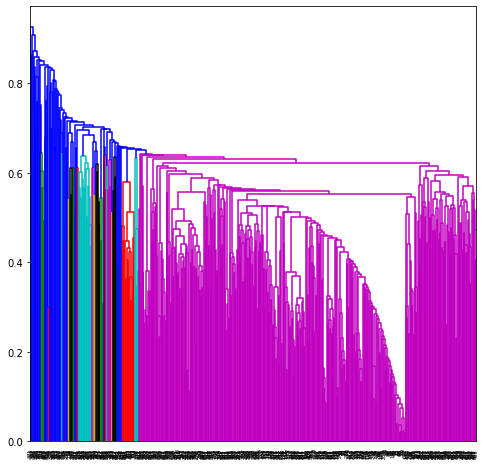

In [11]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(8,8)
res = scipy.cluster.hierarchy.dendrogram(hc)
plt.show()

How many clusters are there if we cut the dendrogram at distance of 0.65?

In [28]:
len(numpy.unique(scipy.cluster.hierarchy.fcluster(hc, 0.65, 'distance')))

62